In [1]:
import spwc
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#plt.rcParams["figure.figsize"] = (12,8)
from datetime import datetime, timedelta
import pandas as pds
from astropy import units

# Use SciQLop cache to speed up data access

SPWC, can take advantage of [SciQLop](http://sciqlop.lpp.polytechnique.fr/) shared proxy server. [This server](http://sciqlop.lpp.polytechnique.fr/cache) act as a cache between remote servers such as [cdaweb](https://cdaweb.gsfc.nasa.gov/index.html/) or [amda](http://amda.irap.omp.eu/) and spwc. It stores data from previous requests in an efficient cache to reduce both latency and total download time. This means you benefit from other users previous requests.

- Note that SPWC has also it's own local cache. Once you got data from either a remote server or SciQLop cache, you won't need to download anymore the same data unless a new version is available or it has been discarded because your local cache was full.

In [3]:
spwc.config.proxy_url.set('http://sciqlop.lpp.polytechnique.fr/cache')
spwc.config.proxy_enabled.set('True')

This means that with a big enough local cache, you don't have to care if you saved your previous requests results.
Just work as if you always get data from remote server, SPWC will take care of everything else.

In [4]:
%timeit spwc.get_data('amda/imf', datetime(2016,6,2), datetime(2016,6,5))

4.01 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# A simple example with ACE IMF data

<IPython.core.display.Javascript object>


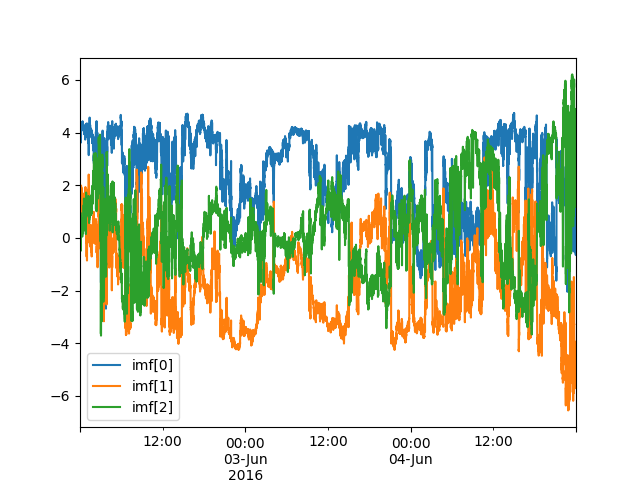

<AxesSubplot:>

In [5]:
ace_mag = spwc.get_data('amda/imf', datetime(2016,6,2), datetime(2016,6,5))
ace_mag.plot()

# SpwcVariable

```get_data``` function returns either a **SpwcVariable** or None when there is no data.
A **SpwcVariable** is like a simplified **DataFrame** with some metadata.

## Metadata, usually instruments data has many metadata such as mission, units...

In [6]:
ace_mag.meta

{'AMDA INFO': '',
 'AMDA_ABOUT': 'Created by AMDA(c)',
 'AMDA_VERSION': '3.6.0',
 'AMDA_ACKNOWLEDGEMENT': 'CDPP/AMDA Team',
 'REQUEST INFO': '',
 'REQUEST_STRUCTURE': 'one-file-per-parameter-per-interval',
 'REQUEST_TIME_FORMAT': 'Seconds from 1970, milliseconds',
 'REQUEST_OUTPUT_PARAMS': 'imf',
 'BASE PARAMETERS': '',
 'MISSION_ID': 'ACE',
 'MISSION_NAME': 'ACE',
 'MISSION_DESCRIPTION': 'Advanced Composition Explorer, NASA',
 'MISSION_URL': 'http://www.srl.caltech.edu/ACE',
 'INSTRUMENT_ID': 'ACE_mag',
 'INSTRUMENT_NAME': 'MAG',
 'INSTRUMENT_DESCRIPTION': 'Magnetic Field Instrument',
 'INSTRUMENT_PI': 'spase://SMWG/Person/Norman.F.Ness',
 'INSTRUMENT_TYPE': 'Magnetometer',
 'DATASET_ID': 'ace-imf-all',
 'DATASET_NAME': 'final / prelim',
 'DATASET_DESCRIPTION': 'Interplanetary Magnetic Field 16-sec Level2/PRELIM Data',
 'DATASET_SOURCE': 'CDPP/DDServer',
 'DATASET_GLOBAL_START': '1997-09-02T00:00:12.000',
 'DATASET_GLOBAL_STOP': '2021-04-03T23:59:58.000',
 'DATASET_MIN_SAMPLING': '16'

For example you can take advantage of [Astropy units](https://docs.astropy.org/en/stable/units/index.html) module to set units:

In [7]:
ace_mag.data * units.Unit(ace_mag.meta['PARAMETER_UNITS'])

<Quantity [[ 4.036,  0.928,  0.47 ],
           [ 4.072,  0.924,  0.422],
           [ 4.113,  0.948,  0.506],
           ...,
           [-0.432, -4.771,  2.997],
           [-0.262, -5.059,  2.512],
           [-0.152, -5.143,  2.354]] nT>

## Columns names:

In [8]:
ace_mag.columns

['imf[0]', 'imf[1]', 'imf[2]']

## Direct access to columns data:

In [9]:
ace_mag.data

array([[ 4.036,  0.928,  0.47 ],
       [ 4.072,  0.924,  0.422],
       [ 4.113,  0.948,  0.506],
       ...,
       [-0.432, -4.771,  2.997],
       [-0.262, -5.059,  2.512],
       [-0.152, -5.143,  2.354]])

## Direct access to time axis:

In [10]:
ace_mag.time

array([1.46482562e+09, 1.46482563e+09, 1.46482565e+09, ...,
       1.46508477e+09, 1.46508478e+09, 1.46508480e+09])

Note that by default time axis is using epoch representation, you can simply convert it to datetime64 like this:

In [11]:
pds.to_datetime(ace_mag.time, unit='s')

DatetimeIndex(['2016-06-02 00:00:15', '2016-06-02 00:00:31',
               '2016-06-02 00:00:47', '2016-06-02 00:01:03',
               '2016-06-02 00:01:19', '2016-06-02 00:01:35',
               '2016-06-02 00:01:51', '2016-06-02 00:02:07',
               '2016-06-02 00:02:23', '2016-06-02 00:02:39',
               ...
               '2016-06-04 23:57:35', '2016-06-04 23:57:51',
               '2016-06-04 23:58:07', '2016-06-04 23:58:23',
               '2016-06-04 23:58:39', '2016-06-04 23:58:55',
               '2016-06-04 23:59:11', '2016-06-04 23:59:27',
               '2016-06-04 23:59:43', '2016-06-04 23:59:59'],
              dtype='datetime64[ns]', length=16200, freq=None)

# Space Objects trajectories

SPWC also gives access to **sscweb** API

In [12]:
start_time = datetime(2018,5,2)
stop_time = datetime(2018,5,20)
moon = spwc.get_orbit('moon', start_time, stop_time, coordinate_system='gse', debug=True)
themis_a = spwc.get_orbit('themisa',  start_time, stop_time, coordinate_system='gse', debug=True)
mms_1 = spwc.get_orbit('mms1',  start_time, stop_time, coordinate_system='gse', debug=True)
cluster_1 = spwc.get_orbit('cluster1',  start_time, stop_time, coordinate_system='gse', debug=True)

In [13]:
pds.to_datetime(np.min(moon.time), unit='s'),pds.to_datetime(np.min(mms_1.time), unit='s')

(Timestamp('2018-05-02 00:00:00'), Timestamp('2018-05-02 00:00:30'))

<IPython.core.display.Javascript object>


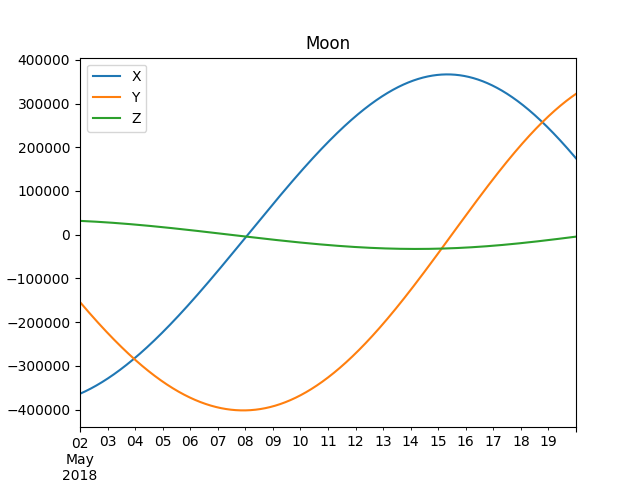

<IPython.core.display.Javascript object>


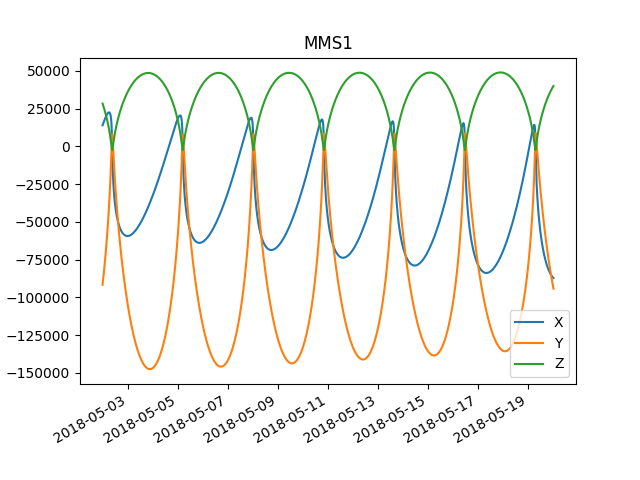

<IPython.core.display.Javascript object>


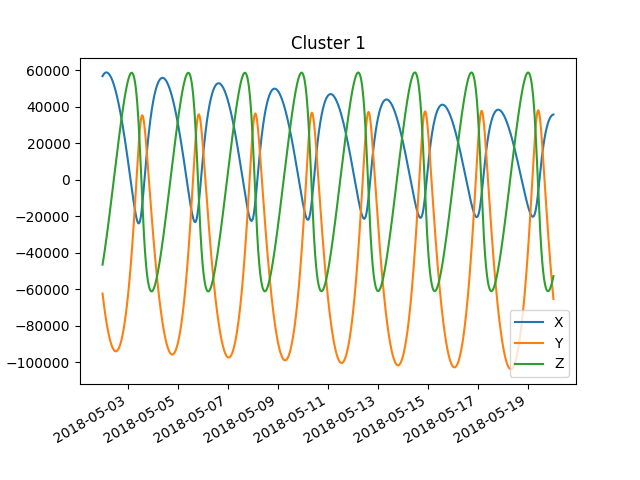

<IPython.core.display.Javascript object>


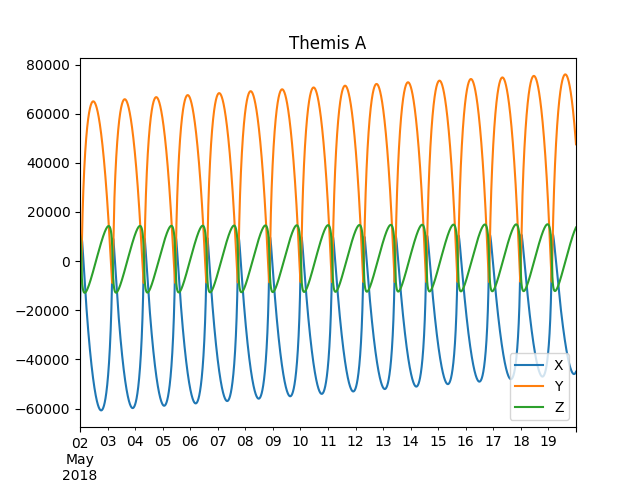

<AxesSubplot:title={'center':'Themis A'}>

In [14]:
moon.plot(title='Moon')
mms_1.plot(title='MMS1')
cluster_1.plot(title='Cluster 1')
themis_a.plot(title='Themis A')

<IPython.core.display.Javascript object>


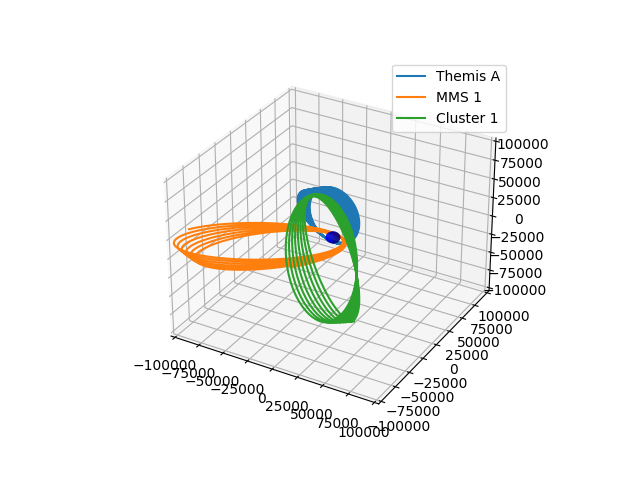

In [15]:
def plot_traj(var, ax, label):
    ax.plot(var.data[:,0],var.data[:,1],var.data[:,2], label=label)

def plot_earth(ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 6371 * np.outer(np.cos(u), np.sin(v))
    y = 6371 * np.outer(np.sin(u), np.sin(v))
    z = 6371 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='b')

fig = plt.figure()
ax = fig.gca(projection='3d')
plot_traj(themis_a, ax, 'Themis A')
plot_traj(mms_1, ax, 'MMS 1')
plot_traj(cluster_1, ax, 'Cluster 1')
plot_earth(ax)
ax.set_xlim(-10e4,10e4)
ax.set_ylim(-10e4,10e4)
ax.set_zlim(-10e4,10e4)
ax.legend()
plt.show()

## [broni](https://github.com/SciQLop/broni)

SPWC is compatible with [broni](https://github.com/SciQLop/broni), a trajectory/object intersection package.

## Available object list from **sscweb**:

In [16]:
observatories = spwc.ssc.get_observatories()
[ (obs['Name'],obs['Id']) for obs in observatories ]

[('ACE', 'ace'),
 ('Active', 'active'),
 ('AEROCUBE-6A', 'aerocube6a'),
 ('AEROCUBE-6B', 'aerocube6b'),
 ('AIM', 'aim'),
 ('Akebono', 'akebono'),
 ('Alouette-1', 'alouette1'),
 ('Alouette-2', 'alouette2'),
 ('APEX-MAIN', 'apex'),
 ('Aqua', 'aqua'),
 ('Arase (ERG)', 'arase'),
 ('ARIEL-4', 'ariel4'),
 ('ARTEMIS_P1', 'artemisp1'),
 ('ARTEMIS_P1 (6-year Predict)', 'artemisp1pred'),
 ('ARTEMIS_P2', 'artemisp2'),
 ('ARTEMIS_P2 (6-year Predict)', 'artemisp2pred'),
 ('ASTRID II', 'astrid2'),
 ('Aura', 'aura'),
 ('BARREL-1A', 'barrel1a'),
 ('BARREL-1B', 'barrel1b'),
 ('BARREL-1C', 'barrel1c'),
 ('BARREL-1D', 'barrel1d'),
 ('BARREL-1G', 'barrel1g'),
 ('BARREL-1H', 'barrel1h'),
 ('BARREL-1I', 'barrel1i'),
 ('BARREL-1J', 'barrel1j'),
 ('BARREL-1K', 'barrel1k'),
 ('BARREL-1M', 'barrel1m'),
 ('BARREL-1O', 'barrel1o'),
 ('BARREL-1Q', 'barrel1q'),
 ('BARREL-1R', 'barrel1r'),
 ('BARREL-1S', 'barrel1s'),
 ('BARREL-1T', 'barrel1t'),
 ('BARREL-1U', 'barrel1u'),
 ('BARREL-1V', 'barrel1v'),
 ('BARREL-2A', '